# Анализ интернет-магазина «Стримчик»

**Описание проекта**

Мы проводим аналитику продаж интернет-магазина "Стримчик", который продает компьютерные игры по всему миру. Нам доступны исторические данные о продаже игр, оценки пользователей и экспертов, жанры и платформы. Мы попытаемся выявить определяющие успешность игры закономерности для дальнейшего планирования продаж.

**Цели проекта**

1. Изучить данные о продажах, оценках пользователей и критиков, жанрах и платформах игр до 2016 года.
2. Проанализировать текущие и прошлые данные, чтобы выявить платформы и жанры с наибольшим потенциалом для продаж в 2017 году.
3. Использовать статистические методы для проверки гипотез.
4. Создать наглядные графики и диаграммы для иллюстрации выявленных закономерностей.
5. Оформить результаты в виде отчёта с рекомендациями.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

## Общая информация

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Извлекли данные и посмотрели на датафрейм. Датафрейм состоит из 11 столбцов и 16714 записей. В некоторых столбцах имеется много пропусков.

## Предобработка данных

Приведем все названия столбцов к нижнему регистру, чтобы с ними было проще работать.

In [6]:
df.columns = [x.lower() for x in df.columns]

Проверим наличие явных дубликатов в датасете.

In [7]:
df.duplicated().sum()

0

Явных дубликатов не обнаружено.

Приведем значения годов к целочисленному виду.


In [8]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

### Обработаем пропуски

In [9]:
df.isna().sum().sort_values()

platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
dtype: int64

Названия компьютерных игр мы никак не заменим, поэтому чтобы эти пропуски нам не мешали в дальнейших рассчетах, мы просто удалим соответсвующие строки. На качество анализа это никак не повлияет.

In [10]:
df.dropna(subset=['name'], inplace=True)

In [11]:
df.isna().sum().sort_values()

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
year_of_release     269
user_score         6699
rating             6764
critic_score       8576
dtype: int64

Посмотрим на оценки пользователей.

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим тут кроме оценок пропуски nan и значения **tbd**. Вторая аббревиатура значит to be determined, то есть рейтинг еще не определен. Возможно, это связано с тем, что было выставлено недостаточно оценок пользователями. Посмотрим сколько таких значений в датафрейме, попробуем их заменить, например, на -1 и приведем столбец к типу float.

In [13]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.3       2
1         2
0.3       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [14]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].fillna(-1)

In [15]:
df['user_score'].astype('float')

0        8.0
1       -1.0
2        8.3
3        8.0
4       -1.0
        ... 
16710   -1.0
16711   -1.0
16712   -1.0
16713   -1.0
16714   -1.0
Name: user_score, Length: 16713, dtype: float64

In [16]:
df['user_score'].value_counts()

-1     9123
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
0.5       2
9.6       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

### Суммарные продажи по всем регионам

In [17]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1,NaN,0.01


Проверили результат. Все правильно.

## Исследовательский анализ

Давайте посмотрим сколько игр выпускалось в разные годы

Text(0.5, 1.0, 'Выпуск игр по годам')

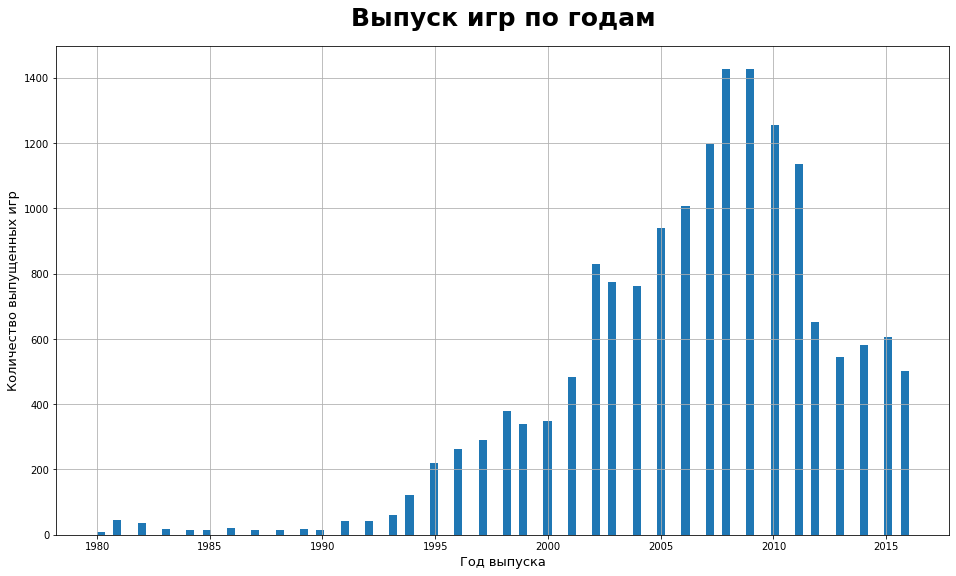

In [19]:
df['year_of_release'].hist(bins=100, figsize=(16,9))
plt.xlabel("Год выпуска", fontsize=13)
plt.ylabel("Количество выпущенных игр", fontsize=13)
plt.title('Выпуск игр по годам',fontsize=25,fontweight='bold', pad=20)

Видим, что количество продаваемых игр, выпущенных после 1995 года, резко растет. Получается, что игры выпущенные ранее не особо важны при анализе, поскольку их количество по отношению к остальным принебрежительно мало. Пик приходится на 2008 и 2009 годы.

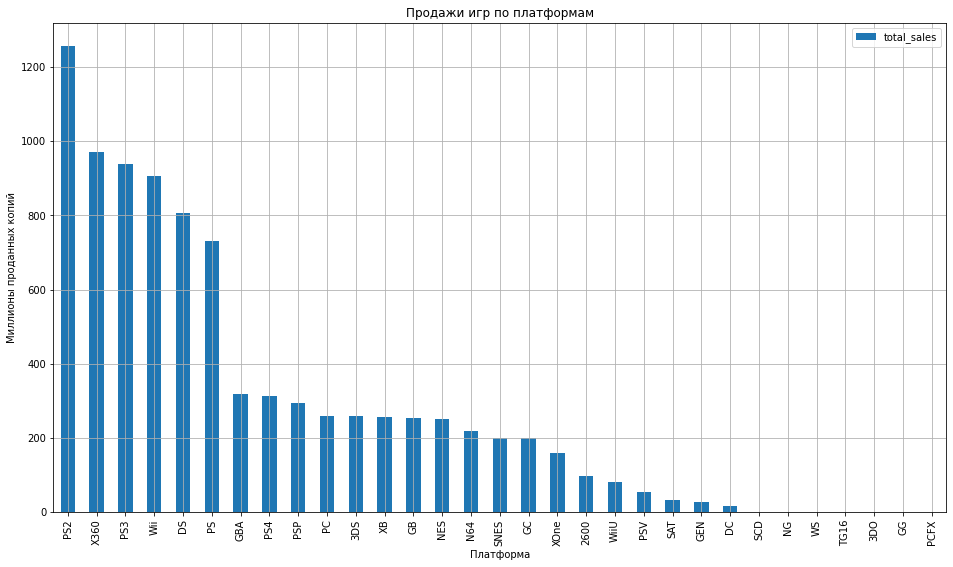

In [20]:
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar',grid=True, figsize=(16, 9))
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Миллионы проданных копий');

Видим, что 6 платформ у нас лидируют с большим отрывом от остальных. Выделим их в отдельный датафрейм и посмотрим распределение по годам.

In [21]:
df_pl=df.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS" or platform=="PS"')

In [22]:
df_pl.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1,NaN,24.67
11,Mario Kart DS,DS,2005,Racing,9.71,7.47,4.13,1.90,91.0,8.6,E,23.21
13,Wii Fit,Wii,2007,Sports,8.92,8.03,3.60,2.15,80.0,7.7,E,22.70
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82


In [23]:
df_new = df_pl.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum',})

In [24]:
df_new

total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
...                               ...
X360     2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52

[67 rows x 1 columns]

In [25]:
df_new = df_new.reset_index()

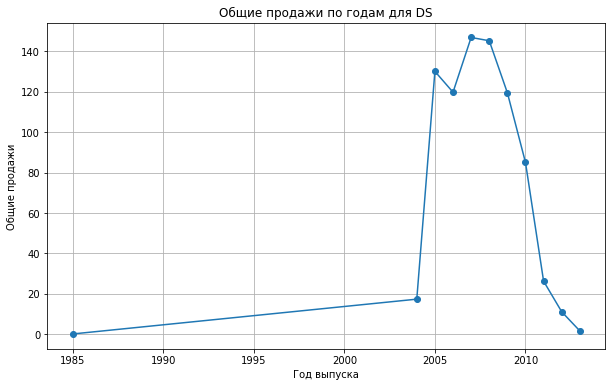

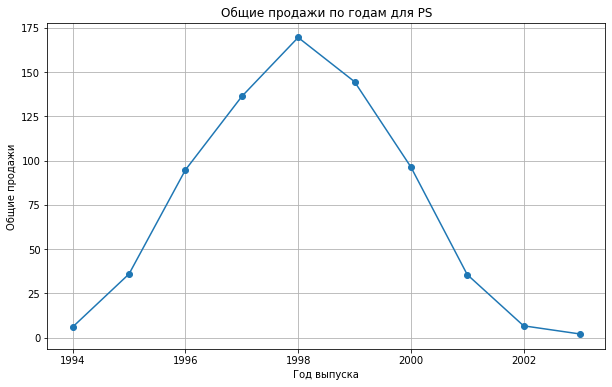

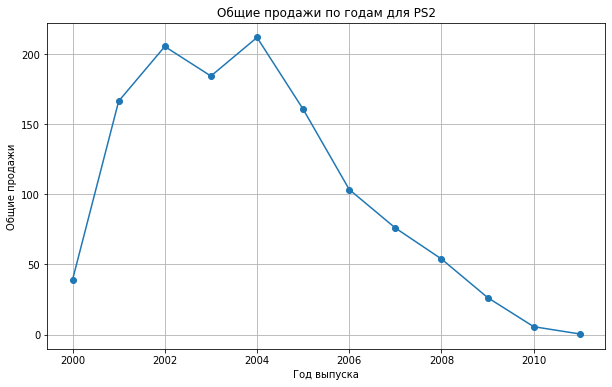

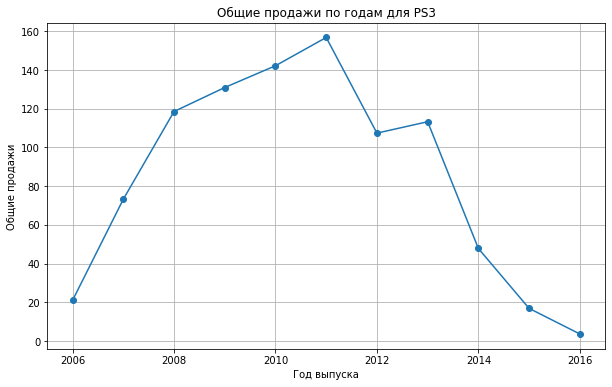

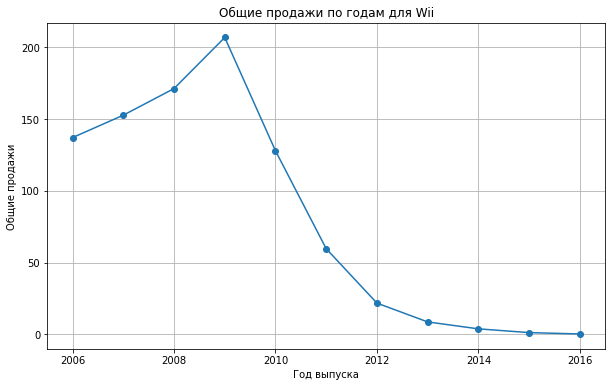

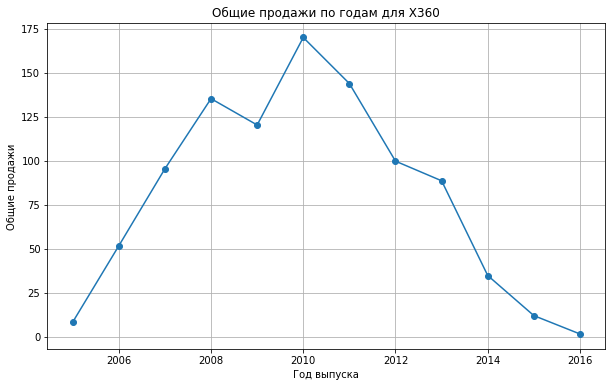

In [26]:
for platform in df_new['platform'].unique():
    platform_data = df_new[df_new['platform'] == platform]
    plt.figure(figsize=(10, 6))
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], marker='o')
    plt.title(f'Общие продажи по годам для {platform}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.grid(True)
    plt.show()

**Вывод:** Каждая платформа существует в среднем около 10 лет и имеет максимальные продажи 3-5 лет. У каждой платформы после пика продаж начиналось резкое падение.

In [27]:
df_new_mean = df_new.pivot_table(index='platform', 
                                                     values='year_of_release', 
                                                     aggfunc=['min', 'max']).reset_index()

df_new_mean.columns = ['platform', 'min_year', 'max_year']

df_new_mean['sum_pl'] = df_new_mean['max_year'] - df_new_mean['min_year']

df_new_mean.sort_values(by='sum_pl', ascending=False).head()

,platform,min_year,max_year,sum_pl
0,DS,1985,2013,28
2,PS2,2000,2011,11
5,X360,2005,2016,11
3,PS3,2006,2016,10
4,Wii,2006,2016,10


Рекордсмен по продолжительности жизни - DS.

Выведем средний и медианный срок существования платформы.

In [28]:
np.ceil(df_new_mean['sum_pl'].mean())

14.0

In [29]:
df_new_mean['sum_pl'].median()

10.5

Отсортируем исходный датасет и оставим данные начиная с 2013 года, поскольку максимальные продажи длятся 3-5 лет.

In [30]:
df_year=df.query('year_of_release>2013')
df_year_p = df_year.groupby(['platform', 'year_of_release']).agg({'total_sales':'sum',})
df_year_p = df_year_p.reset_index()

In [31]:
df_year_p['year_of_release'].unique()

array([2014, 2015, 2016])

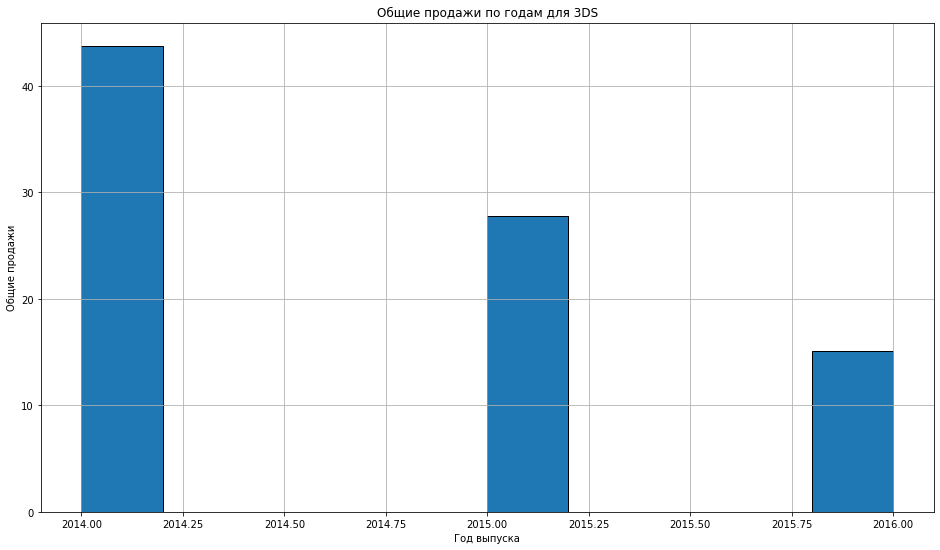

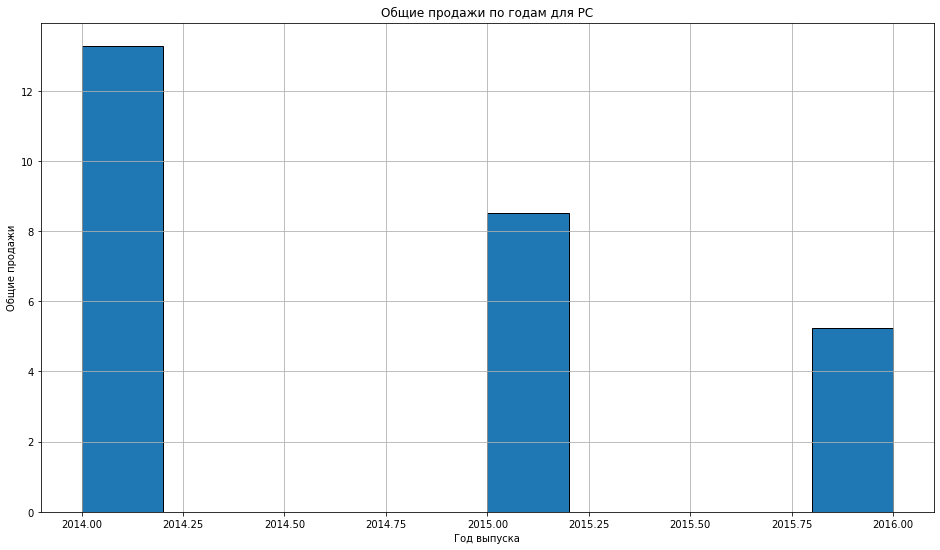

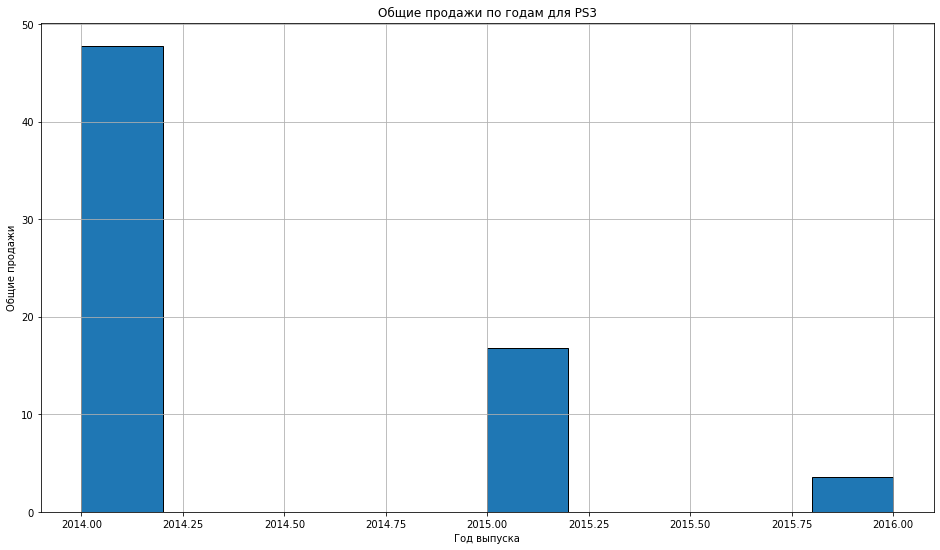

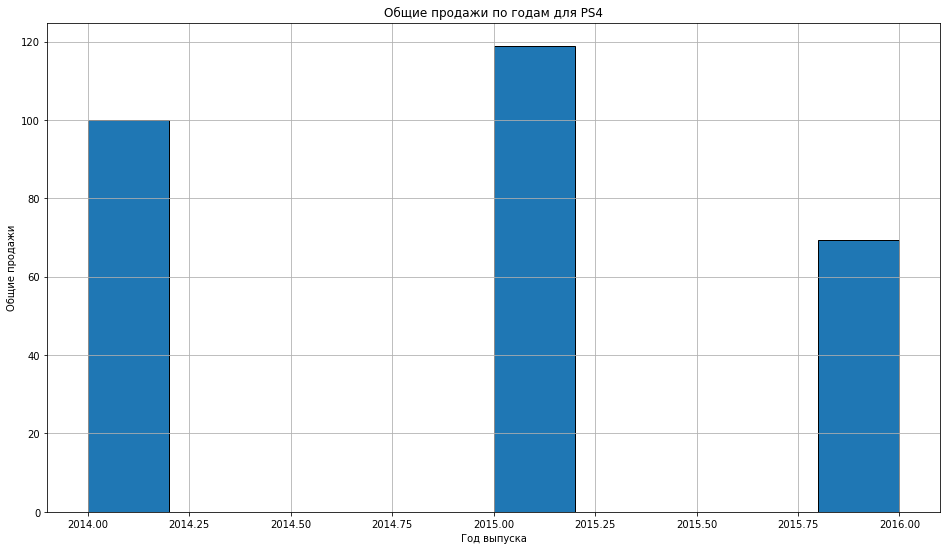

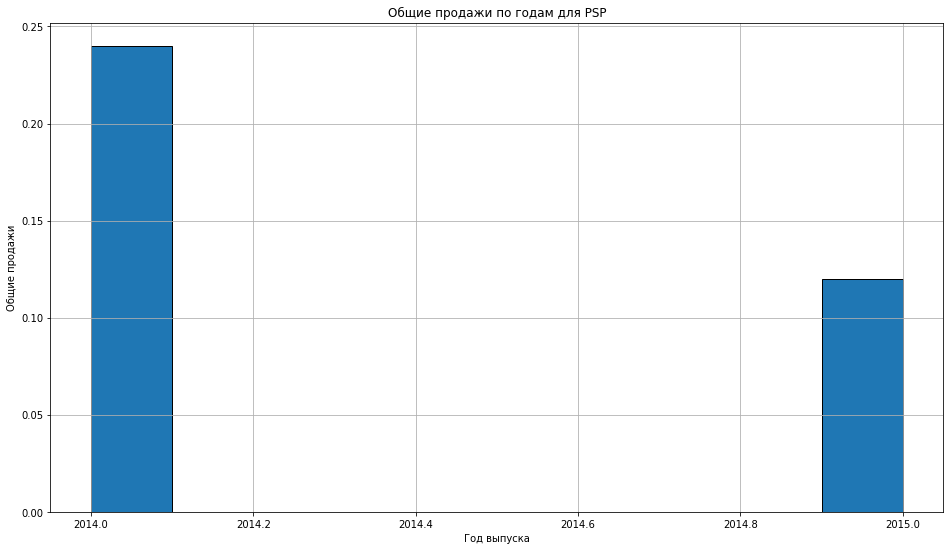

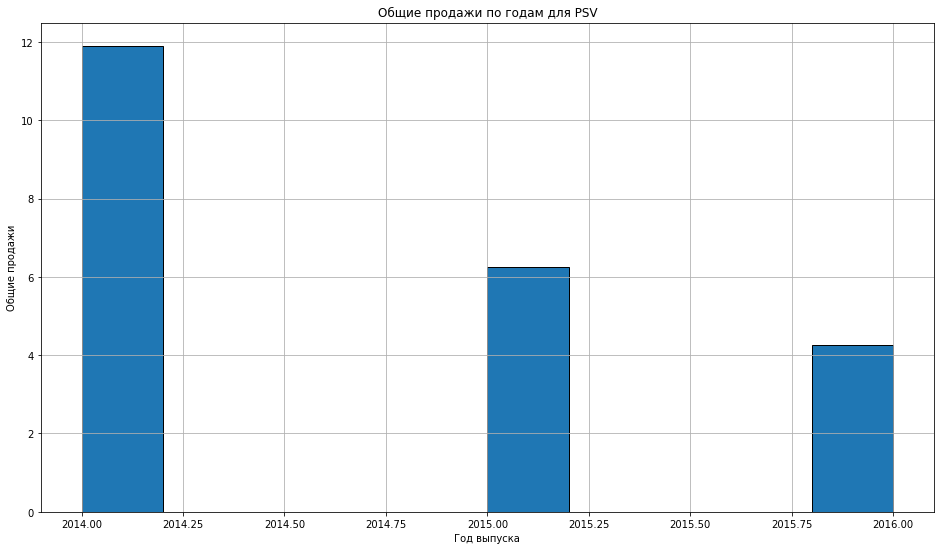

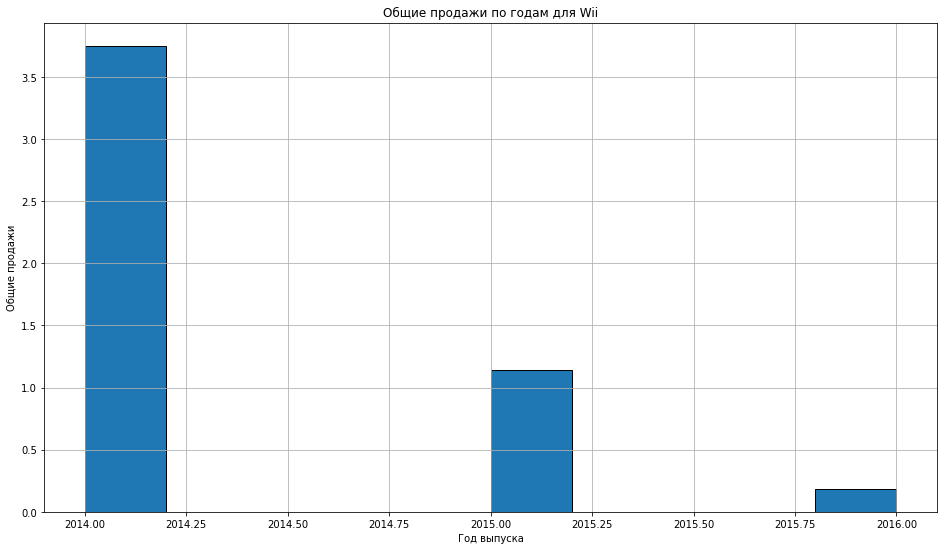

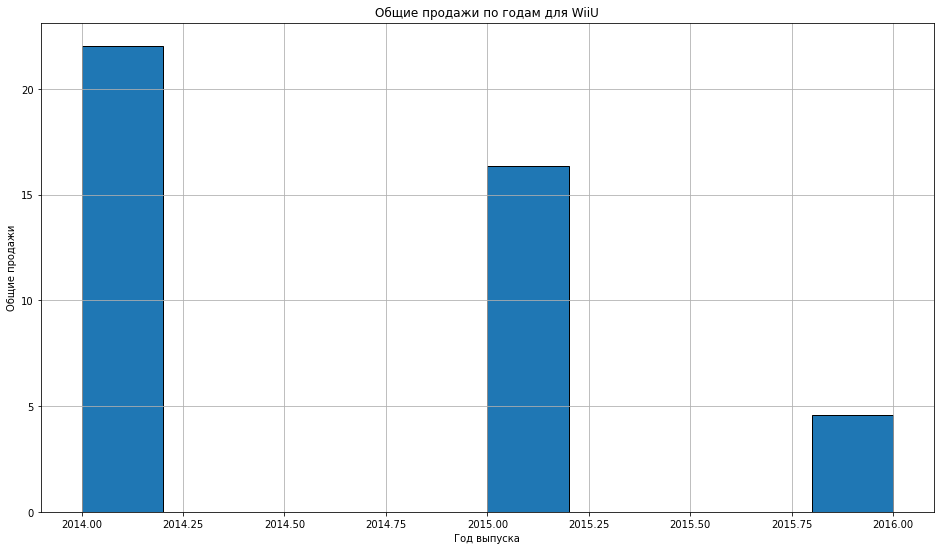

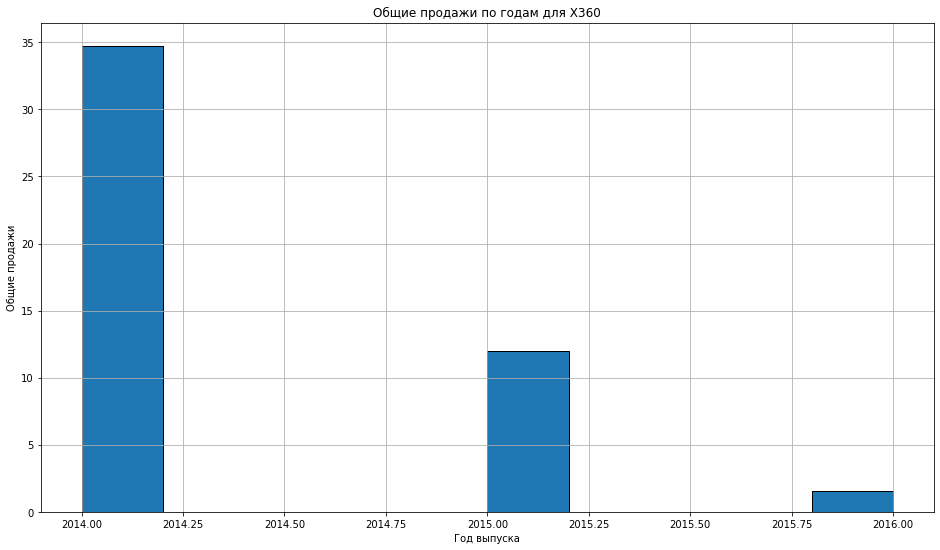

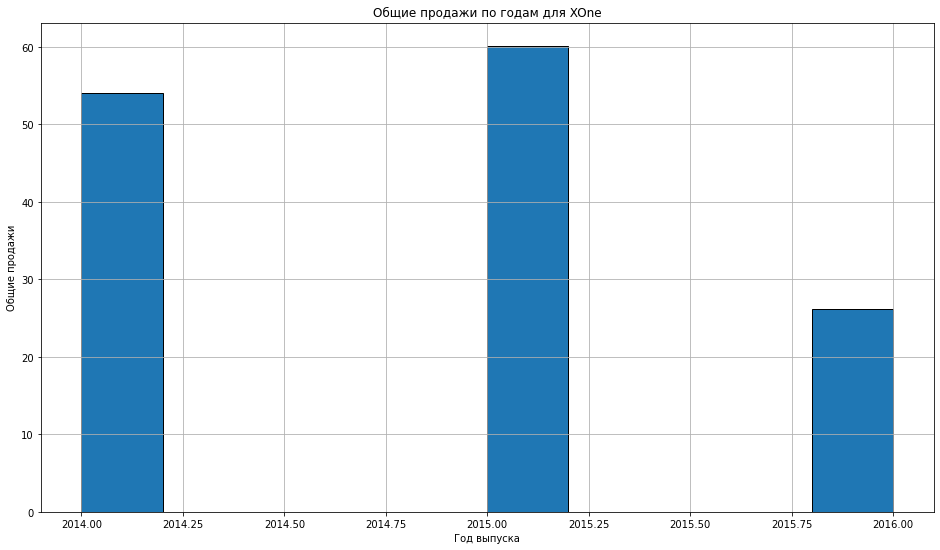

In [32]:
for platform in df_year_p['platform'].unique():
    platform_data = df_year_p[df_year_p['platform'] == platform]
    plt.figure(figsize=(16, 9))
    plt.hist(platform_data['year_of_release'], bins=10, weights=platform_data['total_sales'], edgecolor='black')
    plt.title(f'Общие продажи по годам для {platform}')
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи')
    plt.grid(True)
    plt.show()

Как мы видим, с большим отрывом лидирует PS4 и XOne. Рост был тоже только у этих двух платформ (кроме 2016 года, вероятно это связано с тем, что год еще не кончился и поэтому данных недостаточно). При этом у PC, WiiU, PSV, 3DS, PS3 не было сильного падения.

In [33]:
good_platforms = ['PS4', 'XOne', '3DS', 'PS3', 'WiiU', 'PC', 'PSV']

In [34]:
good_df=df.query('platform in @good_platforms and year_of_release>2013')

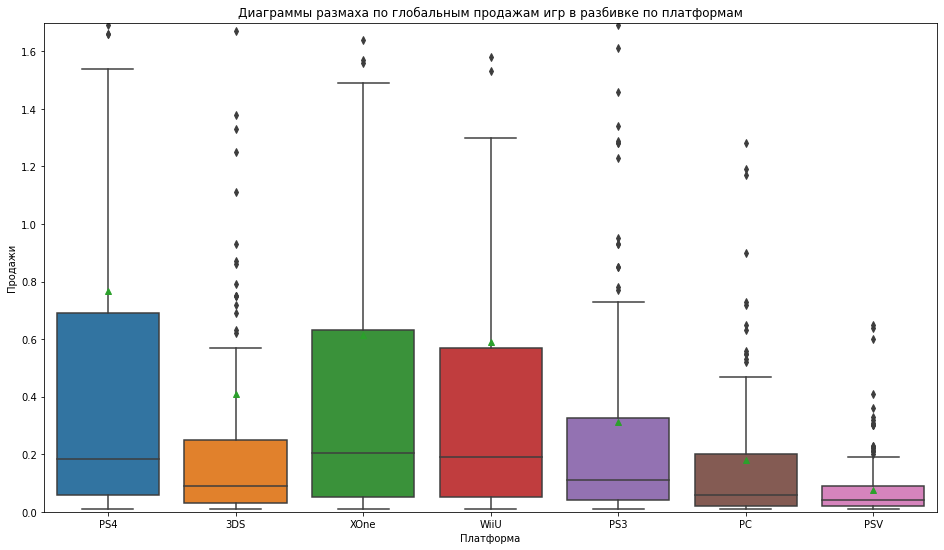

In [35]:
plt.figure(figsize=(16,9))
sns.boxplot(x=good_df['platform'], y=good_df['total_sales'], showmeans = True)
plt.ylim(0, 1.7)
plt.title('Диаграммы размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Все платформы имеют выбросы вверх, поэтому они действительно являются потенциальными. На диаграммах выше наглядно видно, что наибольший потенциал имеют PS4 и XOne.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

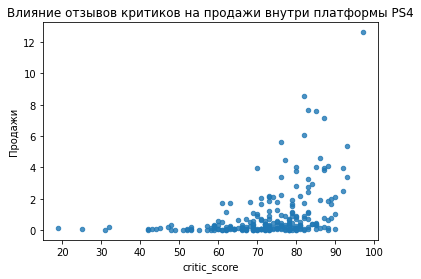

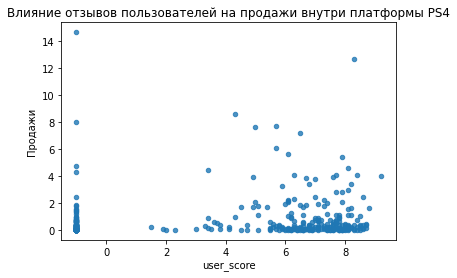

In [36]:
good_df_PS4 = good_df.query('platform == "PS4"')
for name in ['critic_score', 'user_score']:
    good_df_PS4.plot(x=name, y='total_sales', kind='scatter', alpha=0.8)
    if name=='user_score':
        plt.title('Влияние отзывов пользователей на продажи внутри платформы PS4')
    elif name=='critic_score':
        plt.title('Влияние отзывов критиков на продажи внутри платформы PS4')
    plt.ylabel('Продажи')

In [37]:
print(good_df_PS4['total_sales'].corr(good_df_PS4['critic_score']))

0.40266141068104083


In [51]:
good_df_PS4 = good_df_PS4.copy()
good_df_PS4['user_score'] = pd.to_numeric(good_df_PS4['user_score'], errors='coerce')

In [39]:
print(good_df_PS4['total_sales'].corr(good_df_PS4['user_score']))

0.10411505527257948


Как мы видим, продажи для PS4 больше коррелируют с отзывами критиков, чем с отзывами пользователей. Вероятно, покупатели доверяют больше мнению профессионалов, чем простых пользователей. Можно опираясь на это сказать, что для остальных платформ будет такая же картина.

Посмотрим на общее распределение игр по жанрам. 

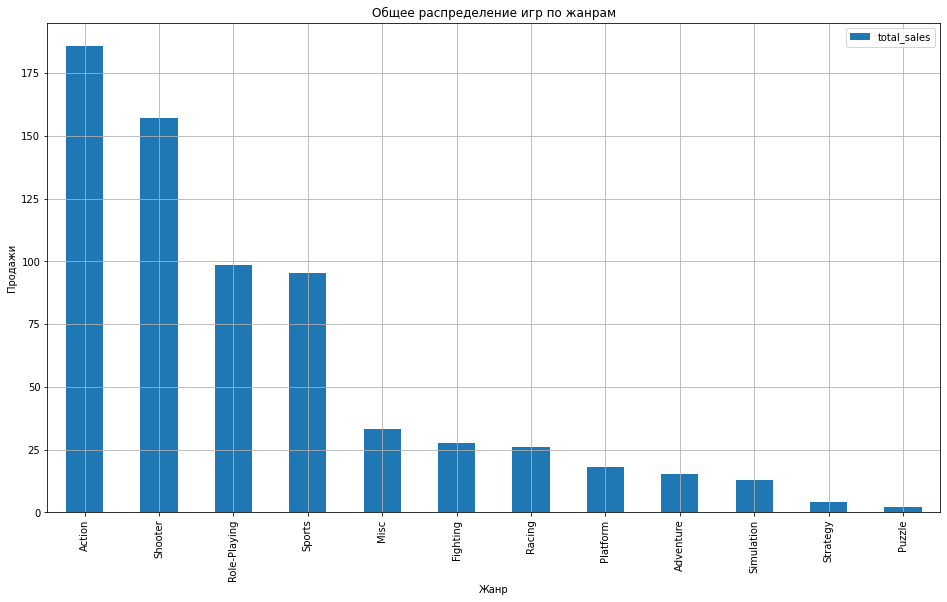

In [40]:
good_df.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot(kind='bar', grid=True, figsize=(16,9))
plt.title('Общее распределение игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи');

Видно, что наибольшей популярностью пользуются жанры Action, Shooter, Role-Playing и Sports.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона самые популярные платформы (топ-5).

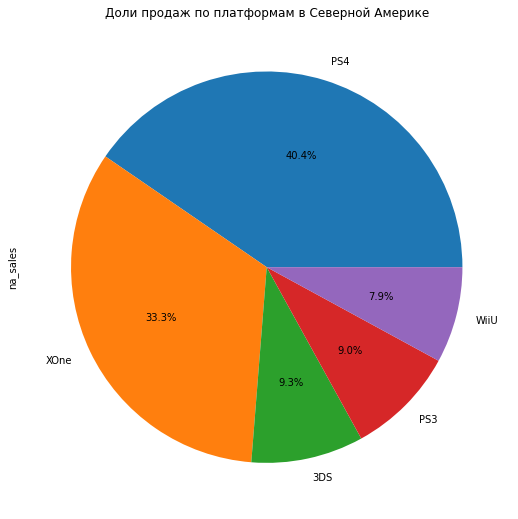

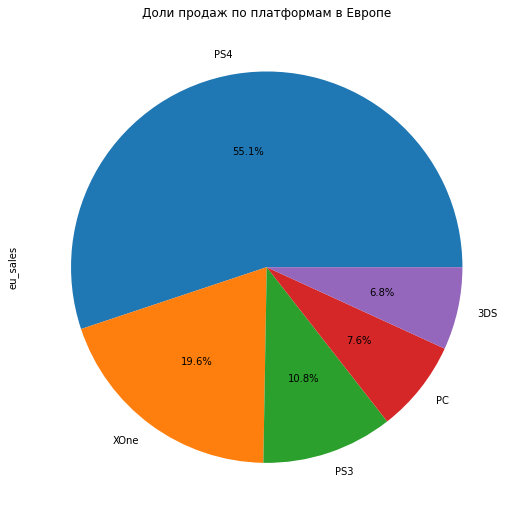

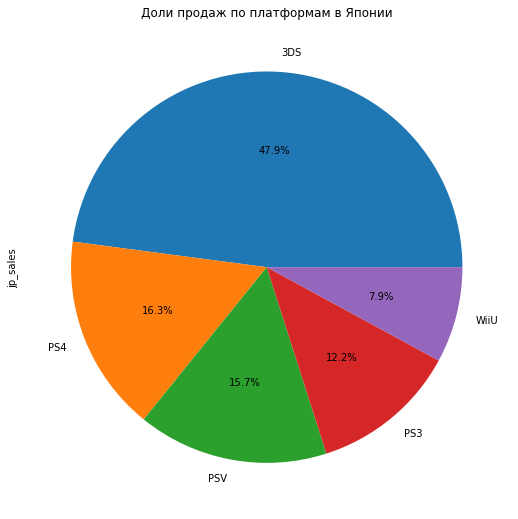

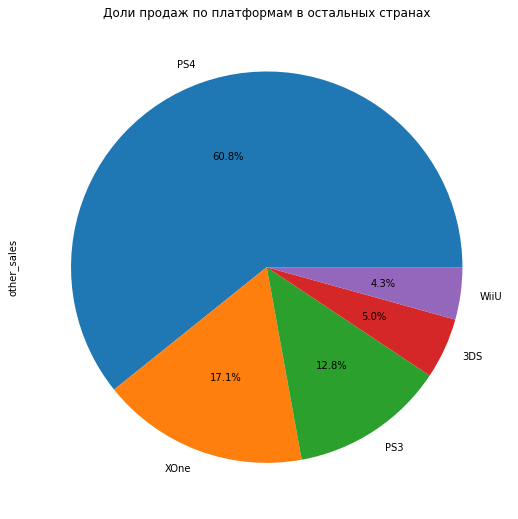

In [41]:
for name in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    good_df.pivot_table(index='platform', values=name, aggfunc='sum'
                       ).sort_values(by=name, ascending=False
                                    ).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%', figsize=(16,9))
    if name=='na_sales':
        plt.title('Доли продаж по платформам в Северной Америке')
    elif name=='eu_sales':
        plt.title('Доли продаж по платформам в Европе')
    elif name=='jp_sales':
        plt.title('Доли продаж по платформам в Японии')
    elif name=='other_sales':
        plt.title('Доли продаж по платформам в остальных странах')

Как мы видим в Европе и остальных странах больше половины рынка занимает в PS4, а второе место занимает XOne. В Северной Америке  они в сумме занимают большую часть рынка. Наибольшую долю рынка XOne занимает в Северной Америке, в Японии же первое место занимает 3DS, а PS4 в Остальных странах.

Определим для пользователя каждого региона самые популярные жанры (топ-5).

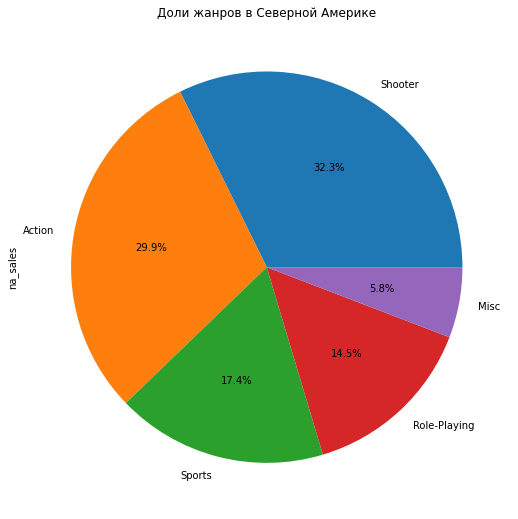

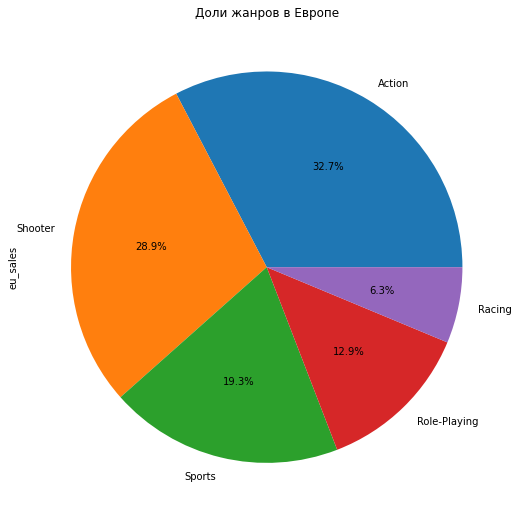

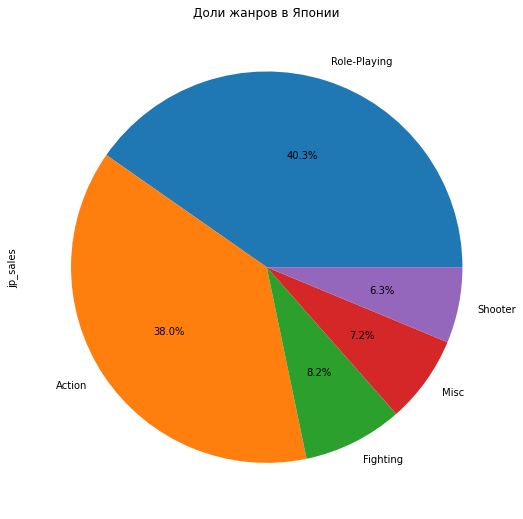

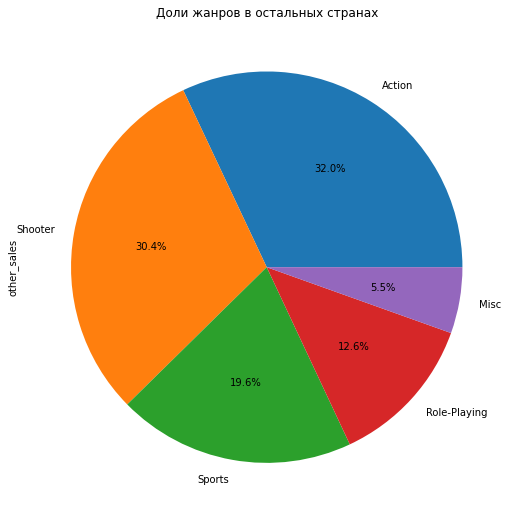

In [42]:
for name in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    good_df.pivot_table(index='genre', values=name, aggfunc='sum').sort_values(by=name, ascending=False).head().plot(kind='pie', y=name, legend=False, autopct='%1.1f%%', figsize=(16,9))
    if name=='na_sales':
        plt.title('Доли жанров в Северной Америке')
    elif name=='eu_sales':
        plt.title('Доли жанров в Европе')
    elif name=='jp_sales':
        plt.title('Доли жанров в Японии')
    elif name=='other_sales':
        plt.title('Доли жанров в остальных странах')

Наибольшую долю рынка в Северной Америке, Европе и остальном мире занимают вместе жанры Shooter и Action. В Японии же большинство предпочитают Role-playing или Action. Наименьшую популярность жанр Sport имеет в Японии, возможно, это связано с тем, что в Японии наибольшую долю рынка занимает портативная платформа 3DS.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Столбец Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Расшифровка рейтинга ESRB:

EC (Early Childhood) — для детей младшего возраста\
E (Everyone) — для всех\
E10+ (Everyone 10 and older) — для всех старше 10 лет\
T (Teen) — подросткам 13-19 лет\
M (Mature 17+) — от 17 лет\
AO (Adults only 18+) — только для взрослых\
K-A (Kids to Adults)— для детей и взрослых\
RP (Rating pending) — рейтинг ожидается

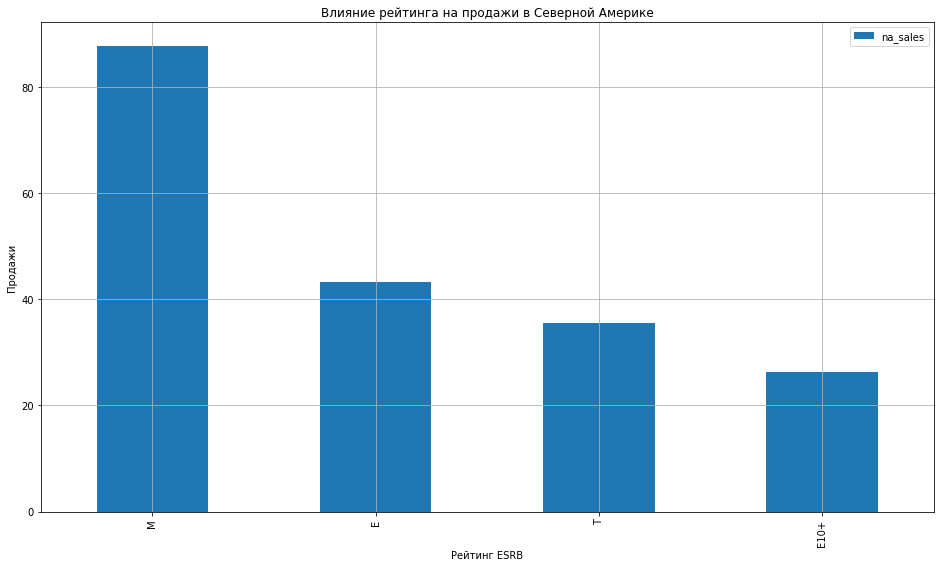

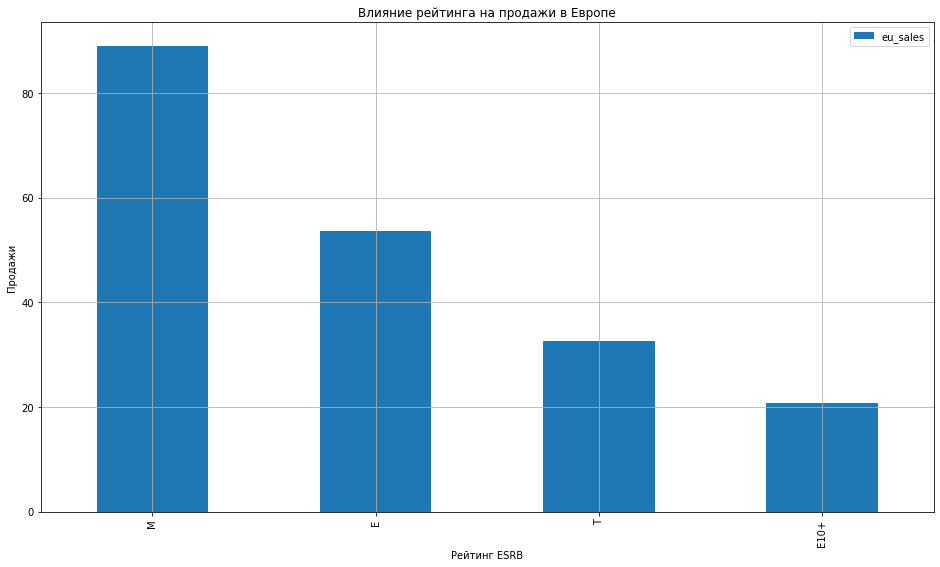

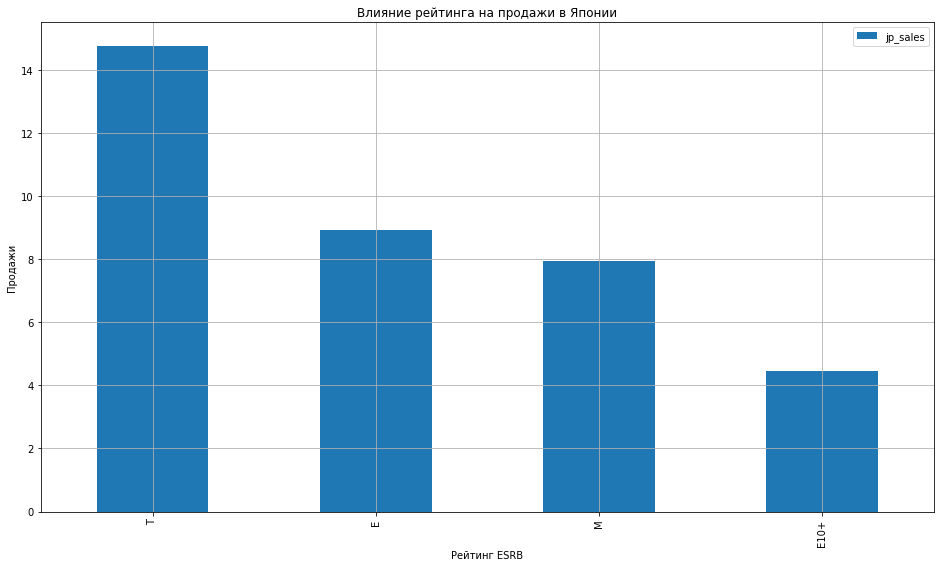

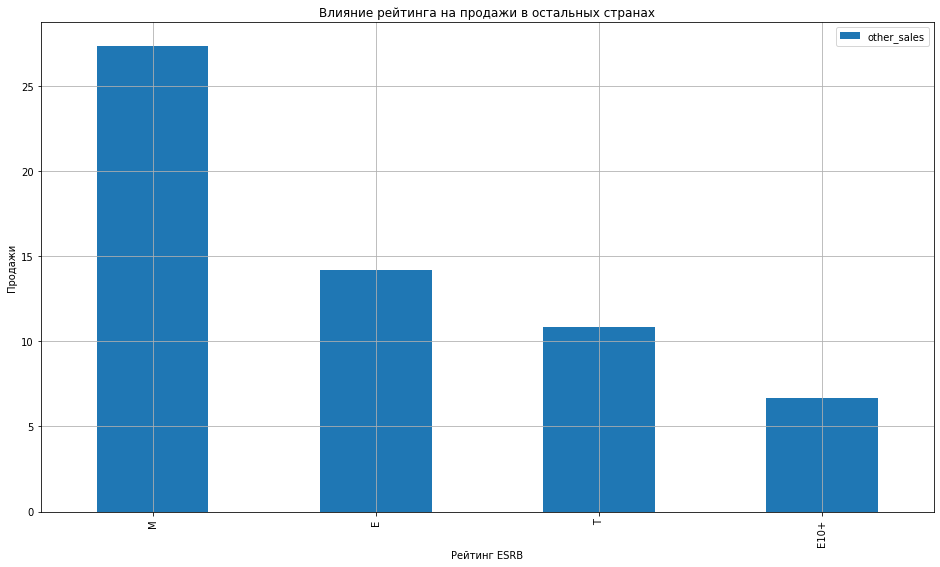

In [43]:
for name in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    good_df.pivot_table(index='rating', values=name, aggfunc='sum').sort_values(by=name, ascending=False).plot(kind='bar', grid=True, figsize=(16,9))
    plt.xlabel('Рейтинг ESRB')
    plt.ylabel('Продажи')
    if name=='na_sales':
        plt.title('Влияние рейтинга на продажи в Северной Америке')
    elif name=='eu_sales':
        plt.title('Влияние рейтинга на продажи в Европе')
    elif name=='jp_sales':
        plt.title('Влияние рейтинга на продажи в Японии')
    elif name=='other_sales':
        plt.title('Влияние рейтинга на продажи в остальных странах')

Мы наблюдаем примерно одинаковую картину в Северной Америке, Европе и остальных странах, где первое место занимает рейтинг M, второе Е, третье Т и 4 место E10+.

В Японии же немного другая картина. Там на первом месте по продажам рейтинг Т, а на третьем М.

## Проверка гипотез

### Гипотеза: cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы.

$H_{0}$ -  cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

$H_{1}$ - cредние пользовательские рейтинги платформ Xbox One и PC различны

Установим статистическую значимость равно 0.05

In [49]:
good_df = good_df.copy()
good_df['user_score'] = pd.to_numeric(good_df['user_score'], errors='coerce')

ps4 = good_df[good_df['platform']=='PS4']['user_score'].dropna()
xone = good_df[good_df['platform']=='XOne']['user_score'].dropna()

alpha=0.05

results = st.ttest_ind(ps4, xone, alternative = 'two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.1518525648331874
Не получилось отвергнуть нулевую гипотезу


**Вывод:** cредние пользовательские рейтинги платформ Xbox One и PC равны.

### Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую и альтернативную гипотезы. В нулевой гипотезе должно быть равенство.

$H_{0}$ -  средние пользовательские рейтинги жанров Action и Sports одинаковые

$H_{1}$ - средние пользовательские рейтинги жанров Action и Sports разные

Установим статистическую значимость равно 0.05

In [50]:
good_df = good_df.copy()
good_df['user_score'] = pd.to_numeric(good_df['user_score'], errors='coerce')

action = good_df[good_df['genre']=='Action']['user_score'].dropna()
sports = good_df[good_df['genre']=='Sports']['user_score'].dropna()

alpha=0.05

results = st.ttest_ind(action, sports, alternative = 'two-sided')

print('p-value:', results.pvalue)

if results.pvalue < alpha:    
    print('Отвергаем нулевую гипотезу')
else: 
   print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.00047316349519729975
Отвергаем нулевую гипотезу


**Вывод:** cредние пользовательские рейтинги жанров Action и Sports различны.

## Вывод

1. Каждая платформа существует в среднем около 10 лет и имеет максимальные продажи 3-5 лет. У каждой платформы после пика продаж начиналось резкое падение.

2. С 2014 года наибольший рост популярности был у платформ PS4 и XOne.

3. Наиболее популярными платформами в Северной Америке и Европе являются PS4 и XOne, в то время как в Японии наиболее популярен 3DS.

4. Отзывы критиков немного влияют на популярность платформ, в то время как отзывы пользователей практически никак не влияют.

5. Наибольшую долю рынка в Северной Америке, Европе и остальном мире занимают вместе жанры Shooter и Action. В Японии же большинство предпочитают Role-playing или Action.

6. Средние пользовательские рейтинги платформ Xbox One и PC равны.

7. Средние пользовательские рейтинги жанров Action и Sports различны.